<a href="https://colab.research.google.com/github/tienduongftu/Learn-Algorithmic-Trading/blob/master/duongnt_test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Kết nối Google Colab với Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Cài thư viện
import sqlite3
import pandas as pd


In [4]:
# Đọc dữ liệu
# Đường dẫn tới file SQLite3 trên Google Drive
db_path = '/content/drive/MyDrive/pyrobot-sync/ohlc_data2.db'

# Kết nối với SQLite database
conn = sqlite3.connect(db_path)

# Tạo một cursor để thực hiện các lệnh SQL
cursor = conn.cursor()


# Đọc dữ liệu từ một bảng (ví dụ: 'trades')
query = "SELECT * FROM intraday_ohlc"
df = pd.read_sql_query(query, conn)

# Hiển thị dữ liệu
print(df.head(5))

# Đóng kết nối
conn.close()


   id   symbol        date  interval  open_price  close_price  high_price  \
0   1  VN30F1M  08/10/2024         1      1340.0       1339.4      1340.0   
1   2  VN30F1M  08/10/2024         1      1339.4       1339.0      1339.5   
2   3  VN30F1M  08/10/2024         1      1339.1       1339.9      1340.0   
3   4  VN30F1M  08/10/2024         1      1340.0       1340.7      1341.2   
4   5  VN30F1M  08/10/2024         1      1340.7       1340.7      1340.8   

   low_price  volume   value  datetime                   timestamp  
0     1338.2    3345  1339.4  09:00:58  2024-10-08 09:00:58.000000  
1     1338.7     794  1339.0  09:01:58  2024-10-08 09:01:58.000000  
2     1339.1     706  1339.9  09:02:58  2024-10-08 09:02:58.000000  
3     1339.8    1701  1340.7  09:03:58  2024-10-08 09:03:58.000000  
4     1340.4     897  1340.7  09:04:58  2024-10-08 09:04:58.000000  


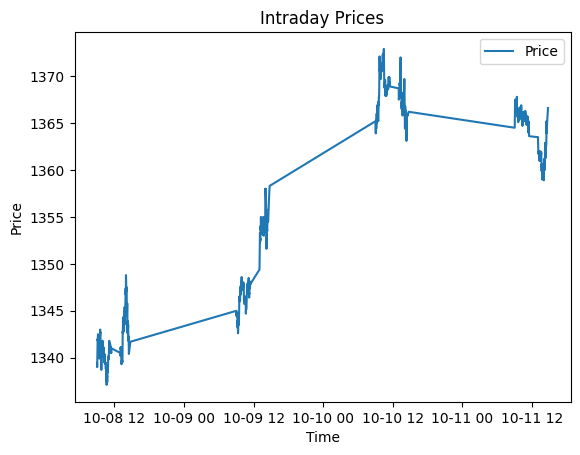

In [5]:
# Phân tích và vẽ biểu đồ
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá Close
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Giả sử có cột timestamp
df.set_index('timestamp', inplace=True)

plt.plot(df.index, df['close_price'], label='Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Intraday Prices')
plt.legend()
# plt.show()
